In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import *

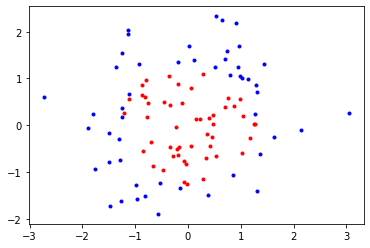

In [3]:
X = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 100)
# print(np.argpartition(X[:, 0]**2+X[:, 1]**2, 99))
X = X[np.argsort(X[:, 0]**2+X[:, 1]**2), :]
Y = X[50:, :].T
X = X[:50, :].T

plt.plot(X[0,:], X[1,:], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')
plt.show()

In [4]:
lambd = cp.Variable(shape=(100,))
gamma = cp.Variable(shape=(100,))

# X2 = X[[0, 45], :]
# Y2 = Y[[0, 45], :]

M = np.concatenate((X, -Y), axis=1)
D = (M.T @ M + 1)**2 + np.eye(M.shape[1]) * 1e-5

def square(col):
    return np.array([1, 2**0.5*col[0], 2**0.5*col[1], 2**0.5*col[0]*col[1], col[0]**2, col[1]**2])

M2 = np.apply_along_axis(square, 0, M)

In [5]:
M2.shape

(6, 100)

In [6]:
print(D.shape)
print(M.shape)
print(np.all(np.linalg.eigvals(D) >= 0))
print(np.linalg.eigvals(D))

(100, 100)
(2, 100)
True
[4.43768336e+02+0.00000000e+00j 2.50176167e+02+0.00000000e+00j
 1.93016099e+02+0.00000000e+00j 1.78394415e+02+0.00000000e+00j
 1.00699323e+02+0.00000000e+00j 3.35196036e+01+0.00000000e+00j
 9.99999997e-06+0.00000000e+00j 9.99999998e-06+0.00000000e+00j
 1.00000000e-05+0.00000000e+00j 1.00000000e-05+0.00000000e+00j
 9.99999999e-06+2.34671874e-15j 9.99999999e-06-2.34671874e-15j
 9.99999998e-06+0.00000000e+00j 9.99999999e-06+0.00000000e+00j
 1.00000000e-05+0.00000000e+00j 1.00000000e-05+1.74303158e-15j
 1.00000000e-05-1.74303158e-15j 1.00000000e-05+1.85864799e-15j
 1.00000000e-05-1.85864799e-15j 1.00000000e-05+0.00000000e+00j
 9.99999999e-06+8.97262006e-16j 9.99999999e-06-8.97262006e-16j
 9.99999999e-06+0.00000000e+00j 9.99999999e-06+6.47130967e-15j
 9.99999999e-06-6.47130967e-15j 9.99999999e-06+0.00000000e+00j
 1.00000000e-05+7.13229629e-15j 1.00000000e-05-7.13229629e-15j
 1.00000000e-05+4.90207729e-16j 1.00000000e-05-4.90207729e-16j
 1.00000000e-05+2.05720603e-15

In [7]:
k = 2
C = 0.1
objective = cp.Minimize( -cp.sum(lambd) + 0.5*cp.quad_form(lambd, D) + (lambd[0]+gamma[0])**(k/(k-1))/(k * C)**(k/(k-1)) * (1-1/k))

constraints= [lambd >= 0, cp.sum(lambd[0:50] - lambd[50:100]) == 0, lambd <= (lambd[0]+gamma[0]), lambd+gamma==C*np.ones(100)]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS, verbose=False)

-0.2301019946748607

In [8]:
lambd.value

array([1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 4.77153988e-10,
       8.26316511e-11, 4.84154054e-02, 2.62157933e-11, 6.16272470e-11,
       3.52178652e-11, 1.64509320e-11, 1.72232082e-11, 1.81707223e-11,
       1.58735278e-11, 1.27694118e-11, 9.89578853e-12, 7.93564251e-12,
       7.51114986e-12, 5.91407879e-12, 4.81090580e-12, 4.55077411e-12,
       4.14590122e-12, 4.49264758e-12, 4.15354756e-12, 3.51766843e-12,
       3.82606565e-12, 3.37575245e-12, 3.07929687e-12, 3.23171445e-12,
       2.20218484e-12, 2.12977345e-12, 2.05345870e-12, 2.13545037e-12,
       1.64254545e-12, 1.88213203e-12, 1.79532959e-12, 1.72720264e-12,
       1.77736983e-12, 1.40255266e-12, 1.61517507e-12, 1.49835231e-12,
       1.29179733e-12, 1.21552043e-12, 1.41602572e-12, 1.34698566e-12,
       1.19581106e-12, 1.29364292e-12, 1.07101357e-12, 1.21149124e-12,
       1.04513910e-12, 1.25531430e-12, 2.72318586e-02, 9.99999999e-02,
       8.24992355e-02, 2.71182549e-11, 4.03714854e-10, 8.69901608e-12,
      

In [9]:
gamma.value + lambd.value

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [10]:
w = np.sum(np.multiply(lambd.value,M2), axis=1)

In [11]:
print(w.shape)
print(M[:, 23].shape)

(6,)
(2,)


[0.71189038 0.7125507  0.7222656  0.7563772  0.76128451 0.75559383
 0.77576343 0.76402202 0.77064568 0.78883059 0.78727836 0.78649016
 0.79050475 0.79970905 0.81226906 0.82813338 0.8309095  0.85153747
 0.87299724 0.87973468 0.89367383 0.88188146 0.89450674 0.91598342
 0.90250625 0.92198392 0.94057976 0.93011303 1.00551321 1.01368315
 1.02359405 1.01599094 1.08311704 1.04344746 1.06067134 1.06756653
 1.06093178 1.1321896  1.08675183 1.10851671 1.1605674  1.18329499
 1.12653043 1.14901267 1.19349951 1.16261713 1.23279871 1.18834966
 1.24288935 1.16805166 1.24440517 1.23074679 1.24440464 1.26578526
 1.24717948 1.31230826 1.24440499 1.25864049 1.24440539 1.24440451
 1.25579954 1.2665311  1.3362985  1.34646207 1.39646131 1.41118311
 1.43996428 1.46242556 1.41977959 1.39823815 1.46906438 1.46248898
 1.45087884 1.48684165 1.5195093  1.57851917 1.6451565  1.5384668
 1.61400305 1.62229572 1.8183749  1.75783471 1.7815172  1.91481708
 1.81455483 1.85907922 1.91063432 1.87779661 1.90871374 2.03564

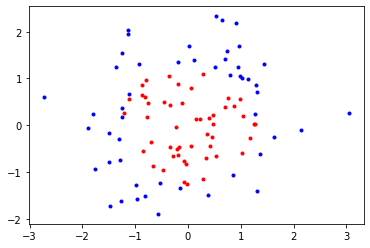

In [21]:
# i1 = 0
# i2 = 2
# plt.plot(X[i1,:], X[i2,:], 'r.')
# plt.plot(Y[i1,:], Y[i2,:], 'b.')
# x = np.linspace(-10, 0, 100)
# y = -(w[i1, 0]*x + b)/w[i2, 0]
# plt.plot(x, y)
# plt.show()
i1 = 0
i2 = 1
plt.plot(X[i1,:], X[i2,:], 'r.')
plt.plot(Y[i1,:], Y[i2,:], 'b.')
# x = np.linspace(-30, 30, 100)
# y = -(w[i1,0]*x + b)/w[i2,0]
print(w.T@M2)
index = np.argpartition(lambd.value, 7)[0]
b = 1 - (w.T@M2[:,index])
print(b)
inds = np.where(w.T@M2+b>0)
y_preds = np.zeros(100)
y_preds[inds] += 1
# print(y)
# plt.plot(x, y)
# plt.grid()
# plt.xticks(np.arange(-30, 60, 5))
# plt.yticks(np.arange(-30, 60, 5))
# plt.show()

In [22]:
y_preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
# print((w[i1,0]*X2[i1,:] + w[i2,0]*X2[i2,:] + b))#/np.linalg.norm(w))
# print((w[i1,0]*Y2[i1,:] + w[i2,0]*Y2[i2,:] + b))#/np.linalg.norm(w))

In [15]:
print(1/np.linalg.norm(w))

1.2096072777931761
